# 觀察PTT韓劇版與日劇版的內文相似度

In [37]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import jieba.analyse
from tqdm import tqdm

## 爬戲劇線上看網站的戲劇名稱
#### 來源：楓林網(http://8maple.ru)

## 韓劇列表

In [49]:
k_title=[]
for k in range(0,2):
    for j in range(2018,2020):
        for i in range(1,40):
            res = requests.get('http://8maple.ru/category/分類/韓劇/韓劇'+str(j)+'/page/'+str(i)+'/')
            soup = BeautifulSoup(res.text, "html.parser")
            for a in soup.find_all("h2",{"class":"entry-title"}):
                k_title.append(a.text)

In [50]:
korea_title=[i.split('/') for i in k_title]
korea_title = ''.join(str(korea_title)) 
korea_title=korea_title.replace("]","").replace("[","").replace("'","").replace(",","\n").replace(" ","")

In [51]:
korea = {'title': korea_title.split('\n')}
korea_list = pd.DataFrame(korea)
korea_list['category'] = '韓劇'
korea_list.head()

,title,category
0,大君-描繪愛情,韓劇
1,經常請吃飯的漂亮姐姐,韓劇
2,我的大叔,韓劇
3,江南緋聞,韓劇
4,放學後戀愛第二季,韓劇


## 日劇列表

In [140]:
j_title=[]
for k in range(0,2):
    for j in range(2018,2020):
        for i in range(1,40):
            res = requests.get('http://8maple.ru/category/分類/日劇/日劇'+str(j)+'/page/'+str(i)+'/')
            soup = BeautifulSoup(res.text, "html.parser")
            for a in soup.find_all("h2",{"class":"entry-title"}):
                j_title.append(a.text)

In [141]:
japan_title=[i.split('/') for i in j_title]
japan_title = ''.join(str(japan_title)) 
japan_title=japan_title.replace("]","").replace("[","").replace("'","").replace(",","\n").replace(" ","")

In [142]:
japan = {'title': japan_title.split('\n')}
japan_list = pd.DataFrame(japan)
japan_list['category'] = '日劇'
japan_list.head()

,title,category
0,殺人劇場,日劇
1,心,日劇
2,繼母與女兒的藍調,日劇
3,假面騎士時王,日劇
4,不會放著事件不管的偵探冬SP,日劇


## 建立字典

In [59]:
title = korea_title+'\n'+japan_title
import csv

with open('dramaname.txt', 'w') as file:

    file.write(title)

## 爬蟲
### 爬取今年下半年的PTT韓劇版與日劇版的文章標題與內容

In [121]:
jieba.set_dictionary('/Users/star/dict.txt.big')
jieba.load_userdict("dramaname.txt")

m = []
f = []
def get_title():
    for i in tqdm(range(2039, 2123)):
        #韓劇版 (2206, 2246)
        #日劇版 (2039,2123)
        res = requests.get("https://www.ptt.cc/bbs/Japandrama/index"+str(i)+".html")
        soup = BeautifulSoup(res.text)
        for website in soup.select(".r-ent"):
            try:
                
                res2 = requests.get('https://www.ptt.cc/'+website('a')[0]['href'])
                soup2 = BeautifulSoup(res2.text)
                if "資訊" in (soup2.select(".article-meta-value")[2].text):
                    pass
                elif "delete" in website.select(".title"):
                    pass
                c = soup2.select(".article-meta-value")[2].text
                d = c.split("]")
                if d[0] == c :
                    content5 = str(c).replace(' ','')
                    jeba1=('/'.join(jieba.cut(str(content5),cut_all=False)))
                    f.append(jeba1)
                else:
                    d = c.split("]")
                    #標題內容
                    content6=d[1]
                    content7=str(content6).replace(' ','')
                    jeba2=('/'.join(jieba.cut(str(content7),cut_all=False)))
                    f.append(jeba2)
                    
                split = soup2.select(".article-meta-value")[3].text
                # 文章內容
                soup3 = soup2.select(".bbs-screen.bbs-content")[0].text
                content =soup3.split(str(split))
                content2 = content[1].split("※") and content[1].split("--")
                content3 = content2[0:-1]
                content4 = str(content3).replace(' ','').replace("\\n","").replace("','","").replace("，","").replace("~","").replace("[","").replace("]","").replace("''","")
                jeba3=jieba.analyse.extract_tags(str(content4),500000)
                m.append(jeba3)        
                    
            except:
                pass
get_title()

Building prefix dict from /Users/star/dict.txt.big ...
Loading model from cache /var/folders/d9/1jgs503j2bb7pzwzprc_ymzm0000gn/T/jieba.u882bbdaf90206d8e2867544727e2acd4.cache
Loading model cost 1.686 seconds.
Prefix dict has been built succesfully.
  0%|          | 0/84 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))
100%|██████████| 84/84 [10:06<00:00,  7.22s/it]


In [112]:
kr_dict = {'title': f,
          'content': m}
kr = pd.DataFrame(kr_dict)
kr['category'] = '韓劇'
kr.head()

,title,content,category
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇
1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇
2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇
3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇
4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇


In [280]:
kr['class'] = kr['title'].apply(lambda x : ''.join(set(x.split('/')).intersection(set(korea_list['title']))))
kr.head()

,title,content,category,class
0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花
1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇,
2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇,
3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇,初次見面我愛你
4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你


In [138]:
jp_dict = {'title': f,
          'content': m}
jp = pd.DataFrame(jp_dict)
jp['category'] = '日劇'
jp.head()

,title,content,category
0,Re/:/［/地雷/］/輪到你了/第二季/EP1,"[木下, 橫濱, 各個, 黑島, 流星, 心怡, 喜歡, 住戶, 沒有, ..., 幾個, ...",日劇
1,輪到你了/第二季/EP1,"[木下, 住戶, 應該, 黑島, 雖然, 真兇, 感覺, 總一, 橫濱, 各個, 流星, 心...",日劇
2,隱匿/於/冬///北澤/一家/SP,"[XD, 秀作, 可愛, SP, 有點, 本篇, 還是, 戲份, 覺得, AI, 雖然, 楠...",日劇
3,2019/夏季/檔/收視/報告,"[http, bit, ly, 07, 22, 8.7, 20, 11START, 21, ...",日劇
4,19/'/春夏/晨間/劇/《/夏空/》/收視/報告/(/雷/),"[小夏, 04, 05, 06, 08, 夢想, 木金土, 19, NHK, 晨間, 夏空,...",日劇


In [281]:
jp['class'] = jp['title'].apply(lambda x : ''.join(set(x.split('/')).intersection(set(japan_list['title']))))
jp.head()

,title,content,category,class
0,Re/:/［/地雷/］/輪到你了/第二季/EP1,"[木下, 橫濱, 各個, 黑島, 流星, 心怡, 喜歡, 住戶, 沒有, ..., 幾個, ...",日劇,輪到你了
1,輪到你了/第二季/EP1,"[木下, 住戶, 應該, 黑島, 雖然, 真兇, 感覺, 總一, 橫濱, 各個, 流星, 心...",日劇,輪到你了
2,隱匿/於/冬///北澤/一家/SP,"[XD, 秀作, 可愛, SP, 有點, 本篇, 還是, 戲份, 覺得, AI, 雖然, 楠...",日劇,
3,2019/夏季/檔/收視/報告,"[http, bit, ly, 07, 22, 8.7, 20, 11START, 21, ...",日劇,
4,19/'/春夏/晨間/劇/《/夏空/》/收視/報告/(/雷/),"[小夏, 04, 05, 06, 08, 夢想, 木金土, 19, NHK, 晨間, 夏空,...",日劇,夏空


In [282]:
drama = kr.append(jp)
drama.reset_index(inplace=True)
drama.head()

,index,title,content,category,class
0,0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花
1,1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇,
2,2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇,
3,3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇,初次見面我愛你
4,4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你


In [283]:
drama.iloc[786:795]

,index,title,content,category,class
786,786,山茶花開時/EP1/-/15/心得,"[他們, 東柏, 這個, 角色, 編劇, 劇情, 勇識, 相當, 覺得, 母親, 演員, 詮...",韓劇,山茶花開時
787,787,韓劇/「/求/、/推薦/區/」,"[推薦, 戲劇, 韓劇, 集數, 求薦, 感謝, 大家, 播出, 依循, 版主, 王世子, ...",韓劇,
788,788,11/月/難以/發文/討論/之/「/閒聊/區/」,"[閒聊, 想要, 板規, 問題, 檢舉, 規範, 聊東, 聊西, 請勿, 發表, 引戰, 推...",韓劇,
789,0,Re/:/［/地雷/］/輪到你了/第二季/EP1,"[木下, 橫濱, 各個, 黑島, 流星, 心怡, 喜歡, 住戶, 沒有, ..., 幾個, ...",日劇,輪到你了
790,1,輪到你了/第二季/EP1,"[木下, 住戶, 應該, 黑島, 雖然, 真兇, 感覺, 總一, 橫濱, 各個, 流星, 心...",日劇,輪到你了
791,2,隱匿/於/冬///北澤/一家/SP,"[XD, 秀作, 可愛, SP, 有點, 本篇, 還是, 戲份, 覺得, AI, 雖然, 楠...",日劇,
792,3,2019/夏季/檔/收視/報告,"[http, bit, ly, 07, 22, 8.7, 20, 11START, 21, ...",日劇,
793,4,19/'/春夏/晨間/劇/《/夏空/》/收視/報告/(/雷/),"[小夏, 04, 05, 06, 08, 夢想, 木金土, 19, NHK, 晨間, 夏空,...",日劇,夏空
794,5,2019/春季/檔/收視/報告,"[平均, 8.7, 22, 2.8, 21, 3.2, 3.1, 6.5, 8.5, 3.7...",日劇,


## TF-IDF

In [284]:
corpus = drama['content'].tolist()

In [285]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [286]:
len(corpus)
features = tfidf.toarray()
labels = drama['class'].values
labels

array(['綠豆花', '', '', ..., '', '', ''], dtype=object)

In [287]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
drama['pca1'] = pd.DataFrame(transData[:,0])
drama['pca2'] = pd.DataFrame(transData[:,1])
drama.head()

,index,title,content,category,class,pca1,pca2
0,0,綠豆花/ep.37/-/40/因愛而生/，/叫/革命,"[利賢, 利康, 沒有, 宋慈, 義軍, 朝鮮, 牛禁峙, 白家, 義兵, 因為, 一樣, ...",韓劇,綠豆花,-0.032938,-0.027204
1,1,Voice3EP16/最終/回,"[com, imgur, jpghttps, https, www, youtube, wa...",韓劇,,-0.028024,0.176133
2,2,"OCN/的/""/姜/刑警/""/們","[刑警, 三位, 神父, 網友, OCN, 出現, 權酒, 雖然, 覺得, 韓國, 聯合, ...",韓劇,,-0.027195,-0.020239
3,3,初次見面我愛你/全劇/心得/(/雷/),"[民益, 佳希, u3000, 沒有, 兩人, 媽媽, https, imgur, com,...",韓劇,初次見面我愛你,-0.046829,-0.039472
4,4,差點/因為/劇名/錯過/的/初次見面我愛你,"[覺得, 佳希, Veronica, 時候, 部長, 有點, 因為, 喜歡, 設定, 兩集,...",韓劇,初次見面我愛你,-0.049156,-0.079528


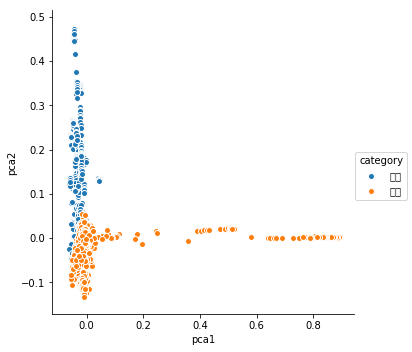

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=drama, hue="category", size=5)

In [289]:
textFrame = pd.DataFrame(features, columns = word)

In [290]:
m = 0.1
dataset = list()
for i in range(len(features)):
    temp = textFrame.columns.values[[textFrame.iloc[i] >= m]]
    dataset.append(temp.tolist())

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


## Term Document Matrix

In [291]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
graph = df.T
graph.columns = drama['class']

In [292]:
graph.tail()

class,綠豆花,,,初次見面我愛你,初次見面我愛你,輔佐官,檢法男女,,,,...,,夏洛克潤一,緋紅,凪的新生活,,,偽裝不倫,,,
龐克,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龐大,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龐式,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龜戶,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龜縮,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori

In [293]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [294]:
dataset = corpus
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [307]:
frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
rules_by_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print(rules_by_lift)

             antecedents          consequents  antecedent support  \
0                  (...)                 (自己)            0.244982   
1                   (自己)                (...)            0.430971   
2                   (10)                (com)            0.277755   
3                  (com)                 (10)            0.369111   
4                   (10)              (https)            0.277755   
5                (https)                 (10)            0.465793   
6                 (2019)              (https)            0.183531   
7                (https)               (2019)            0.465793   
8                 (http)                (com)            0.213847   
9                  (com)               (http)            0.369111   
10                 (com)              (https)            0.369111   
11               (https)                (com)            0.465793   
12               (imgur)                (com)            0.226956   
13                 (com)          

In [308]:
rules_by_lift["antecedent_len"] = rules_by_lift["antecedents"].apply(lambda x: len(x))
rules_by_lift[ (rules_by_lift['antecedent_len'] >= 1) &
               (rules_by_lift['confidence'] >= 0.75) &
               (rules_by_lift['lift'] >= 1.4) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
6,(2019),(https),0.183531,0.465793,0.165916,0.904018,1.940816,0.080428,5.565695,1
8,(http),(com),0.213847,0.369111,0.162638,0.760536,2.060454,0.083705,2.634592,1
10,(com),(https),0.369111,0.465793,0.343712,0.931188,1.999146,0.171782,7.763238,1
12,(imgur),(com),0.226956,0.369111,0.226956,1.000000,2.709212,0.143184,inf,1
14,(jpg),(com),0.240475,0.369111,0.238017,0.989779,2.681520,0.149255,61.721972,1
16,(www),(com),0.294961,0.369111,0.231872,0.786111,2.129742,0.122999,2.949611,1
19,(導演),(com),0.201966,0.369111,0.167554,0.829615,2.247602,0.093006,3.702717,1
30,(imgur),(https),0.226956,0.465793,0.220811,0.972924,2.088749,0.115097,19.730056,1
32,(jpg),(https),0.240475,0.465793,0.233101,0.969336,2.081045,0.121090,17.421093,1
34,(www),(https),0.294961,0.465793,0.276936,0.938889,2.015680,0.139545,8.741574,1


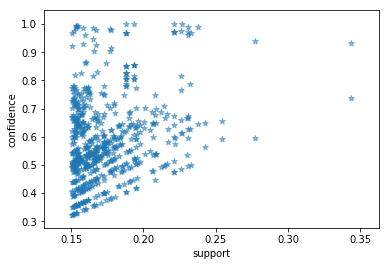

In [309]:
support = rules_by_lift['support']
confidence = rules_by_lift['confidence']
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

## Graph

In [298]:
import networkx as nx
G = nx.DiGraph()
for i in range(len(drama)):
    G.add_node(i)
for i in range(len(rules_by_lift['antecedents'])):
    currentFrom = list(rules_by_lift['antecedents'][i])
    currentTo = list(rules_by_lift['consequents'][i])
    for j in range(len(currentFrom)):
        G.add_edge(currentFrom[j], currentTo[0])

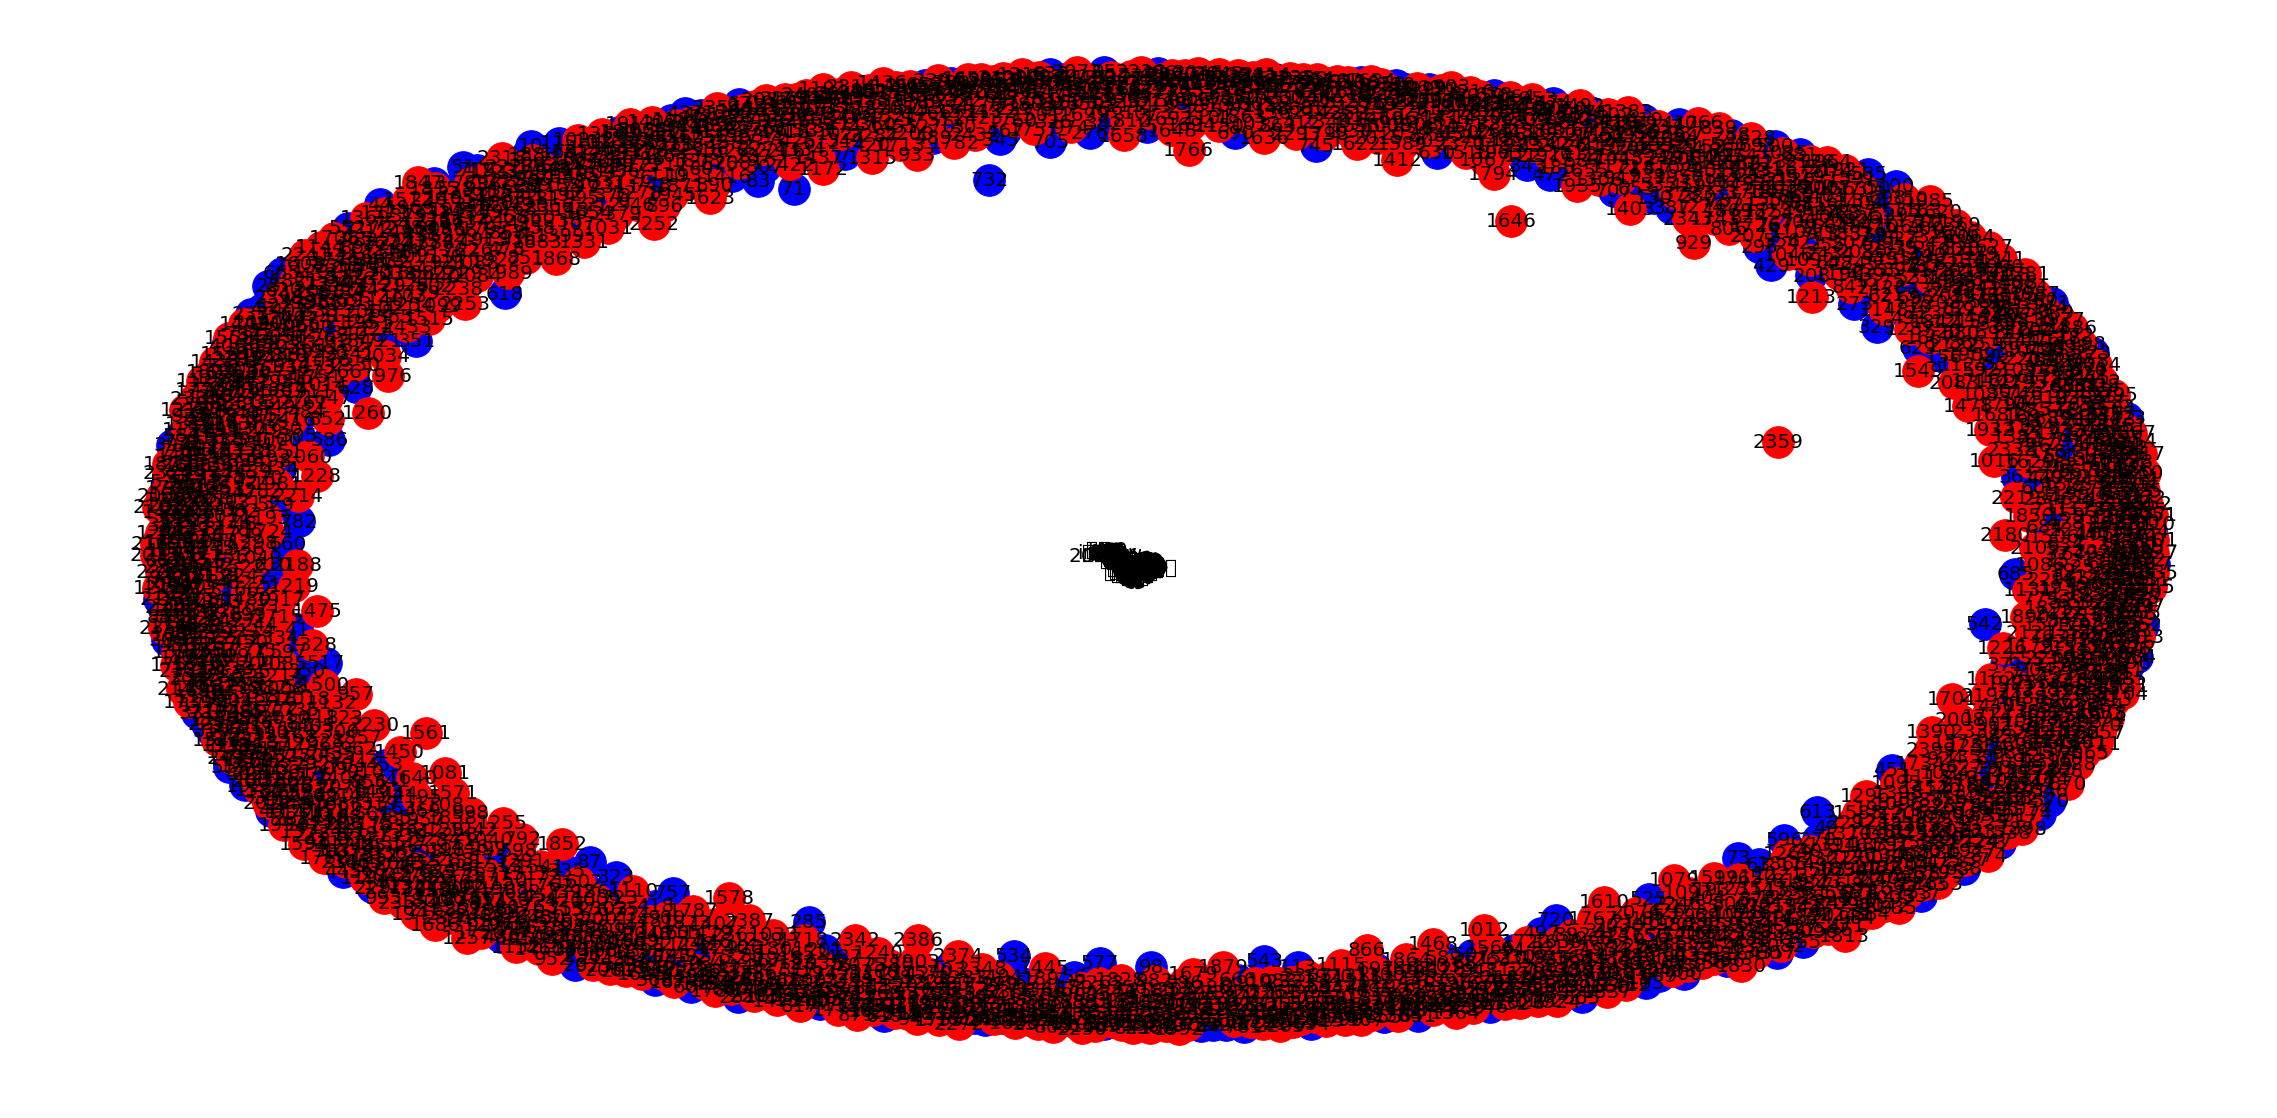

In [299]:
nodeListA = drama.index[drama['category'] == '韓劇'].tolist()
nodeListB = drama.index[drama['category'] == '日劇'].tolist()

plt.figure(figsize=(40,20))

# positions for all nodes
pos = nx.fruchterman_reingold_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, nodelist=nodeListA, node_color="b", node_size=1000)
nx.draw_networkx_nodes(G, pos, nodelist=nodeListB, node_color="r", node_size=1000)
nx.draw_networkx_edges(G, pos, width=6)

# labels
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

plt.axis('off')
# plt.savefig("weighted_graph.png") # save as png
plt.show() # display

In [304]:
# 獨立
len(list(nx.isolates(G)))

2441

In [300]:
# 小群體
from networkx.algorithms.approximation import dominating_set
dominating_set.min_edge_dominating_set(G)

{('...', '自己'),
 ('10', 'com'),
 ('https', '2019'),
 ('imgur', 'jpg'),
 ('www', '導演'),
 ('一個', '不是'),
 ('什麼', '可以'),
 ('因為', '一起'),
 ('就是', '可能'),
 ('所以', '最後'),
 ('時間', '演員'),
 ('沒有', '一直'),
 ('看到', '真的'),
 ('知道', '覺得'),
 ('編劇', '角色'),
 ('還是', '應該'),
 ('開始', '雖然')}

In [302]:
graph.tail()

class,綠豆花,,,初次見面我愛你,初次見面我愛你,輔佐官,檢法男女,,,,...,,夏洛克潤一,緋紅,凪的新生活,,,偽裝不倫,,,
龐克,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龐大,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龐式,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龜戶,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
龜縮,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
